Machine Learning with PySpark
---

**Course Description**

Spark is a powerful, general purpose tool for working with Big Data. Spark transparently handles the distribution of compute tasks across a cluster. This means that operations are fast, but it also allows you to focus on the analysis rather than worry about technical details. In this course you'll learn how to get data into Spark and then delve into the three fundamental Spark Machine Learning algorithms: Linear Regression, Logistic Regression/Classifiers, and creating pipelines. Along the way you'll analyse a large dataset of flight delays and spam text messages. With this background you'll be ready to harness the power of Spark and apply it on your own Machine Learning projects!


https://projector-video-pdf-converter.datacamp.com/14989/chapter1.pdf


In [ ]:
import pyspark
import numpy as np
import pandas as pd

# 1. Introduction


Spark is a framework for working with Big Data. In this chapter you'll cover some background about Spark and Machine Learning. You'll then find out how to connect to Spark using Python and load CSV data.

## 1.1 Machine Learning & Spark

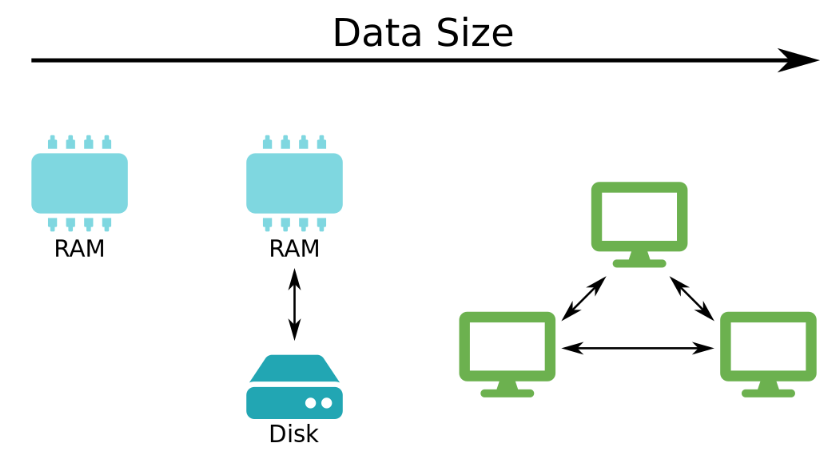
- Spark
    - Compute accross a distributed cluster.
    - Data processed in memory
    - Well documented high level API 
    
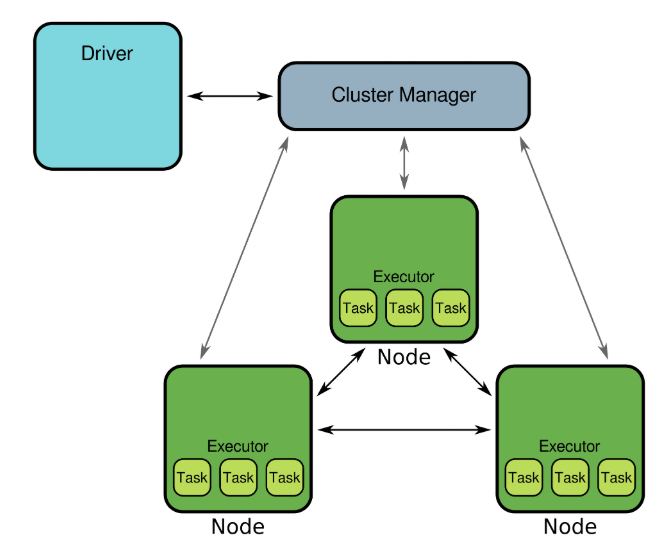

## 1.2 Characteristics of Spark

Spark is currently the most popular technology for processing large quantities of data. Not only is it able to handle enormous data volumes, but it does so very efficiently too! Also, unlike some other distributed computing technologies, developing with Spark is a pleasure.

Which of these describe Spark?

##### Answer the question

**50XP**

#### Possible Answers

- Spark is a framework for cluster computing.
    
- Spark does most processing in memory.
    
- Spark has a high-level API, which conceals a lot of complexity.

- **All of the above.**

Spark has all of this and more!



## 1.3 Components in a Spark Cluster

Spark is a distributed computing platform. It achieves efficiency by distributing data and computation across a cluster of computers.

A Spark cluster consists of a number of hardware and software components which work together.

Which of these is not part of a Spark cluster?

##### Answer the question

**50XP**

#### Possible Answers

- One or more nodes
    
    
- A cluster manager
    
    
- **A load balancer**
    
    
- Executors

A load balancer distributes work across multiple resources, preventing overload on any one resource. In Spark this function is performed by the cluster manager.

## 1.4 Connecting to Spark
### Creating-a-SparkSession

In this exercise, you'll spin up a local Spark cluster using all available cores. The cluster will be accessible via a SparkSession object.

The `SparkSession` class has a builder attribute, which is an instance of the `Builder` class. The `Builder` class exposes three important methods that let you:

- specify the location of the master node;
- name the application (optional); and
- retrieve an existing `SparkSession` or, if there is none, create a new one.

The `SparkSession` class has a `version` attribute which gives the version of Spark.

Find out more about `SparkSession` [here](https://spark.apache.org/docs/3.0.0/api/python/pyspark.sql.html#pyspark.sql.SparkSession).

Once you are finished with the cluster, it's a good idea to shut it down, which will free up its resources, making them available for other processes.



In [ ]:
from pyspark.sql import SparkSession

# Create SparkSession object
spark = SparkSession.builder.master('local[*]').appName('test').getOrCreate()

# What version of Spark?
print(spark.version)

# Terminate the cluster
spark.stop()

## 1.5 Location of Spark master

Which of the following is **not** a valid way to specify the location of a Spark cluster?

##### Answer the question

**50XP**

#### Possible Answers

- `spark://13.59.151.161:7077`
    
    
- `spark://ec2-18-188-22-23.us-east-2.compute.amazonaws.com:7077`
    
    
- **`spark://18.188.22.23`**
    
    
- `local`
    
    
- `local[4]`
    
    
- `local[*]`

A Spark URL must always include a port number, so this URL is not valid.



## 1.6 Creating a SparkSession

In this exercise, you'll spin up a local Spark cluster using all available cores. The cluster will be accessible via a `SparkSession` object.

The `SparkSession` class has a `builder` attribute, which is an instance of the `Builder` class. The `Builder` class exposes three important methods that let you:

- specify the location of the master node;
- name the application (optional); and
- retrieve an existing `SparkSession` or, if there is none, create a new one.

The `SparkSession` class has a `version` attribute which gives the version of Spark.

Find out more about `SparkSession` [here](https://spark.apache.org/docs/2.3.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession).

Once you are finished with the cluster, it's a good idea to shut it down, which will free up its resources, making them available for other processes.

**Note::** You might find it useful to review the slides from the lessons in the _Slides_ panel next to the _IPython Shell_.

##### Instructions

**100 XP**

- Import the `SparkSession` class from `pyspark.sql`.
- Create a `SparkSession` object connected to a local cluster. Use all available cores. Name the application `'test'`.
- Use the `SparkSession` object to retrieve the version of Spark running on the cluster. **Note:** The version might be different to the one that's used in the presentation (it gets updated from time to time).
- Shut down the cluster.

In [ ]:
# Import the SparkSession class
from pyspark.sql import SparkSession

# Create SparkSession object
spark = SparkSession.builder \
                    .master('local[*]') \
                    .appName('test') \
                    .getOrCreate()

# What version of Spark?
print(spark.version)

# Terminate the cluster
spark.stop()

Nicely done! The session object will now allow us to load data into Spark.



## 1.7 Loading Data

## 1.8 Loading flights data

In this exercise you're going to load some airline flight data from a CSV file. To ensure that the exercise runs quickly these data have been trimmed down to only 50 000 records. You can get a larger dataset in the same format [here](https://assets.datacamp.com/production/repositories/3918/datasets/e1c1a03124fb2199743429e9b7927df18da3eacf/flights-larger.csv).

Notes on CSV format:

- fields are separated by a comma (this is the default separator) and
- missing data are denoted by the string 'NA'.

Data dictionary:

- `mon` — month (integer between 1 and 12)
- `dom` — day of month (integer between 1 and 31)
- `dow` — day of week (integer; 1 = Monday and 7 = Sunday)
- `org` — origin airport ([IATA code](https://en.wikipedia.org/wiki/IATA_airport_code))
- `mile` — distance (miles)
- `carrier` — carrier ([IATA code](https://en.wikipedia.org/wiki/List_of_airline_codes))
- `depart` — departure time (decimal hour)
- `duration` — expected duration (minutes)
- `delay` — delay (minutes)

`pyspark` has been imported for you and the session has been initialized.

_Note:_ The data have been aggressively down-sampled.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Read data from a CSV file called 'flights.csv'. Assign data types to columns automatically. Deal with missing data.
- How many records are in the data?
- Take a look at the first five records.
- What data types have been assigned to the columns? Do these look correct?

In [ ]:
# Read data from CSV file
flights = spark.read.csv('flights.csv',
                         sep=',',
                         header=True,
                         inferSchema=True,
                         nullValue='NA')

# Get number of records
print("The data contain %d records." % flights.count())

# View the first five records
flights.show(5)

# Check column data types
print(flights.dtypes)

The correct data types have been inferred for all of the columns.



## 1.9 Loading SMS spam data

You've seen that it's possible to infer data types directly from the data. Sometimes it's convenient to have direct control over the column types. You do this by defining an explicit schema.

The file `sms.csv` contains a selection of SMS messages which have been classified as either 'spam' or 'ham'. These data have been adapted from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection). There are a total of 5574 SMS, of which 747 have been labelled as spam.

Notes on CSV format:

- no header record and
- fields are separated by a semicolon (this is **not** the default separator).

Data dictionary:

- `id` — record identifier
- `text` — content of SMS message
- `label` — spam or ham (integer; 0 = ham and 1 = spam)

##### Instructions

**100 XP**

- Specify the data schema, giving columns names (`"id"`, `"text"`, and `"label"`) and column types.
- Read data from a delimited file called `"sms.csv"`.
- Print the schema for the resulting DataFrame.

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

# Specify column names and types
schema = StructType([
    StructField("id", IntegerType()),
    StructField("text", StringType()),
    StructField("label", IntegerType())
])

# Load data from a delimited file
sms = spark.read.csv("sms.csv", sep=';', header=False, schema=schema)

# Print schema of DataFrame
sms.printSchema()

Excellent! You now know how to initiate a Spark session and load data. In the next chapter you'll use the data you've just loaded to build a classification model.



# 2. Classification

Now that you are familiar with getting data into Spark, you'll move onto building two types of classification model: Decision Trees and Logistic Regression. You'll also find out about a few approaches to data preparation.

## 2.1 Data Preparation

## 2.2 Removing columns and rows

You previously loaded airline flight data from a CSV file. You're going to develop a model which will predict whether or not a given flight will be delayed.

In this exercise you need to trim those data down by:

1. removing an uninformative column and
2. removing rows which do not have information about whether or not a flight was delayed.

The data are available as `flights`.

**Note::** You might find it useful to revise the slides from the lessons in the _Slides_ panel next to the _IPython Shell_.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Remove the `flight` column.
- Find out how many records have missing values in the `delay` column.
- Remove records with missing values in the `delay` column.
- Remove records with missing values in any column and get the number of remaining rows.

In [ ]:
# Remove the 'flight' column
flights_drop_column = flights.drop('flight')

# Number of records with missing 'delay' values
flights_drop_column.filter('delay IS NULL').count()

# Remove records with missing 'delay' values
flights_valid_delay = flights_drop_column.filter('delay IS NOT NULL')

# Remove records with missing values in any column and get the number of remaining rows
flights_none_missing = flights_valid_delay.dropna()
print(flights_none_missing.count())

You've discarded the columns and rows which will certainly not contribute to a model.



## 2.3 Column manipulation

The Federal Aviation Administration (FAA) considers a flight to be "delayed" when it arrives 15 minutes or more after its scheduled time.

The next step of preparing the flight data has two parts:

1. convert the units of distance, replacing the `mile` column with a `km`column; and
2. create a Boolean column indicating whether or not a flight was delayed.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Import a function which will allow you to round a number to a specific number of decimal places.
- Derive a new `km` column from the `mile` column, rounding to zero decimal places. One mile is 1.60934 km.
- Remove the `mile` column.
- Create a `label` column with a value of 1 indicating the delay was 15 minutes or more and 0 otherwise.

In [ ]:
# Import the required function
from pyspark.sql.functions import round

# Convert 'mile' to 'km' and drop 'mile' column
flights_km = flights.withColumn('km', 
                    round(flights.mile * 1.60934, 0)).drop('mile')

# Create 'label' column indicating whether flight delayed (1) or not (0)
flights_km = flights_km.withColumn('label', (flights_km.delay >= 15).cast('integer'))

# Check first five records
flights_km.show(5)

Fifteen minutes seems like quite a wide margin, but who are you to argue with the FAA?



## 2.4 Categorical columns

In the flights data there are two columns, `carrier` and `org`, which hold categorical data. You need to transform those columns into indexed numerical values.

##### Instructions

**100 XP**

- Import the appropriate class and create an indexer object to transform the `carrier` column from a string to an numeric index.
- Prepare the indexer object on the flight data.
- Use the prepared indexer to create the numeric index column.
- Repeat the process for the `org` column.

In [ ]:
from pyspark.ml.feature import StringIndexer

# Create an indexer
indexer = StringIndexer(inputCol='carrier', outputCol='carrier_idx')

# Indexer identifies categories in the data
indexer_model = indexer.fit(flights)

# Indexer creates a new column with numeric index values
flights_indexed = indexer_model.transform(flights)

# Repeat the process for the other categorical feature
flights_indexed = StringIndexer(inputCol='org', outputCol='org_idx').fit(flights_indexed).transform(flights_indexed)

Our Machine Learning model needs numbers not strings, so these transformations are vital!



## 2.5 Assembling columns

The final stage of data preparation is to consolidate all of the predictor columns into a single column.

An _updated_ version of the `flights` data, which takes into account all of the changes from the previous few exercises, has the following predictor columns:

- `mon`, `dom` and `dow`
- `carrier_idx` (indexed value from `carrier`)
- `org_idx` (indexed value from `org`)
- `km`
- `depart`
- `duration`

##### Instructions

**100 XP**

- Import the class which will assemble the predictors.
- Create an assembler object that will allow you to merge the predictors columns into a single column.
- Use the assembler to generate a new consolidated column.

In [ ]:
# Import the necessary class
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
assembler = VectorAssembler(inputCols=[
    'mon', 'dom', 'dow',
    'carrier_idx', 'org_idx',
    'km', 'depart', 'duration'
], outputCol='features')

# Consolidate predictor columns
flights_assembled = assembler.transform(flights)

# Check the resulting column
flights_assembled.select('features', 'delay').show(5, truncate=False)

The data are now ready for building our first Machine Learning model. You've worked hard to get this sorted: well done!



## 2.6 Decision Tree

## 2.7  Train/test split

To objectively assess a Machine Learning model you need to be able to test it on an independent set of data. You can't use the same data that you used to train the model: of course the model will perform (relatively) well on those data!

You will split the data into two components:

- training data (used to train the model) and
- testing data (used to test the model).

##### Instructions

**100 XP**

- Randomly split the `flights` data into two sets with 80:20 proportions. For repeatability set a random number seed of 17 for the split.
- Check that the training data has roughly 80% of the records from the original data.

In [ ]:
# Split into training and testing sets in a 80:20 ratio
flights_train, flights_test = flights.randomSplit([0.8, 0.2], seed=17)

# Check that training set has around 80% of records
training_ratio = flights_train.count() / flights_test.count()
print(training_ratio)

The ratio looks as expected. You're ready to train and test a Decision Tree model!



## 2.8 Build a Decision Tree

Now that you've split the flights data into training and testing sets, you can use the training set to fit a Decision Tree model.

The data are available as `flights_train` and `flights_test`.

NOTE: It will take a few seconds for the model to train… please be patient!

##### Instructions

**100 XP**

- Import the class for creating a Decision Tree classifier.
- Create a classifier object and fit it to the training data.
- Make predictions for the testing data and take a look at the predictions.

In [ ]:
# Import the Decision Tree Classifier class
from pyspark.ml.classification import DecisionTreeClassifier

# Create a classifier object and fit to the training data
tree = DecisionTreeClassifier()
tree_model = tree.fit(flights_train)

# Create predictions for the testing data and take a look at the predictions
prediction = tree_model.transform(flights_test)
prediction.select('label', 'prediction', 'probability').show(5, False)

Congratulations! You've built your first Machine Learning model with PySpark. Now to test!



## 2.9 Evaluate the Decision Tree

You can assess the quality of your model by evaluating how well it performs on the testing data. Because the model was not trained on these data, this represents an objective assessment of the model.

A _confusion matrix_ gives a useful breakdown of predictions versus known values. It has four cells which represent the counts of:

- _True Negatives_ (TN) — model predicts negative outcome & known outcome is negative
- _True Positives_ (TP) — model predicts positive outcome & known outcome is positive
- _False Negatives_ (FN) — model predicts negative outcome but known outcome is positive
- _False Positives_ (FP) — model predicts positive outcome but known outcome is negative.

##### Instructions

**100 XP**

- Create a confusion matrix by counting the combinations of `label` and `prediction`. Display the result.
- Count the number of True Negatives, True Positives, False Negatives and False Positives.
- Calculate the accuracy.

In [ ]:
# Create a confusion matrix
prediction.groupBy('label', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND label = prediction').count()
TP = prediction.filter('prediction = 1 AND label = prediction').count()
FN = prediction.filter('prediction = 0 AND label = 1').count()
FP = prediction.filter('prediction = 1 AND label = 0').count()

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

The accuracy is decent but there are a lot of false predictions. We can make this model better!



## 2.10 Logistic Regression

## 2.11 Build a Logistic Regression model

You've already built a Decision Tree model using the flights data. Now you're going to create a Logistic Regression model on the same data.

The objective is to predict whether a flight is likely to be delayed by at least 15 minutes (label `1`) or not (label `0`).

Although you have a variety of predictors at your disposal, you'll only use the `mon`, `depart` and `duration` columns for the moment. These are numerical features which can immediately be used for a Logistic Regression model. You'll need to do a little more work before you can include categorical features. Stay tuned!

The data have been split into training and testing sets and are available as `flights_train` and `flights_test`.

##### Instructions

**100 XP**

- Import the class for creating a Logistic Regression classifier.
- Create a classifier object and train it on the training data.
- Make predictions for the testing data and create a confusion matrix.

In [ ]:
# Import the logistic regression class
from pyspark.ml.classification import LogisticRegression

# Create a classifier object and train on training data
logistic = LogisticRegression().fit(flights_train)

# Create predictions for the testing data and show confusion matrix
prediction = logistic.transform(flights_test)
prediction.groupBy('label', 'prediction').count().show()

Now let's unpack that confusion matrix.



## 2.12 Evaluate the Logistic Regression model

Accuracy is generally not a very reliable metric because it can be biased by the most common target class.

There are two other useful metrics:

- _precision_ and
- _recall_.

Check the slides for this lesson to get the relevant expressions.

Precision is the proportion of positive predictions which are correct. For all flights which are predicted to be delayed, what proportion is actually delayed?

Recall is the proportion of positives outcomes which are correctly predicted. For all delayed flights, what proportion is correctly predicted by the model?

The precision and recall are generally formulated in terms of the positive target class. But it's also possible to calculate _weighted_ versions of these metrics which look at both target classes.

The components of the confusion matrix are available as `TN`, `TP`, `FN` and `FP`, as well as the object `prediction`.

##### Instructions

**100 XP**

- Find the precision and recall.
- Create a multi-class evaluator and evaluate weighted precision.
- Create a binary evaluator and evaluate AUC using the `"areaUnderROC"` metric.

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Calculate precision and recall
precision =  TP / (TP + FP)
recall = TP / (TP + FN)
print('precision = {:.2f}\nrecall    = {:.2f}'.format(precision, recall))

# Find weighted precision
multi_evaluator = MulticlassClassificationEvaluator()
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC
binary_evaluator = BinaryClassificationEvaluator()
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})

The weighted precision indicates what proportion of predictions (positive and negative) are correct.



## 2.13 Turning Text into Tables


## 2.14 Punctuation, numbers and tokens

At the end of the previous chapter you loaded a dataset of SMS messages which had been labeled as either "spam" (label `1`) or "ham" (label `0`). You're now going to use those data to build a classifier model.

But first you'll need to prepare the SMS messages as follows:

- remove punctuation and numbers
- tokenize (split into individual words)
- remove stop words
- apply the hashing trick
- convert to TF-IDF representation.

In this exercise you'll remove punctuation and numbers, then tokenize the messages.

The SMS data are available as `sms`.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Import the function to replace regular expressions and the feature to tokenize.
- Replace all punctuation characters from the `text` column with a space. Do the same for all numbers in the `text` column.
- Split the `text` column into tokens. Name the output column `words`.

In [ ]:
# Import the necessary functions
from pyspark.sql.functions import regexp_replace
from pyspark.ml.feature import Tokenizer

# Remove punctuation (REGEX provided) and numbers
wrangled = sms.withColumn('text', regexp_replace(sms.text, '[_():;,.!?\\-]', ' '))
wrangled = wrangled.withColumn('text', regexp_replace(wrangled.text, '[0-9]', ' '))

# Merge multiple spaces
wrangled = wrangled.withColumn('text', regexp_replace(wrangled.text, ' +', ' '))

# Split the text into words
wrangled = Tokenizer(inputCol='text', outputCol='words').transform(wrangled)

wrangled.show(4, truncate=False)

Well done! Next you'll remove stop words and apply the hashing trick.



## 2.15 Stop words and hashing

The next steps will be to remove stop words and then apply the hashing trick, converting the results into a TF-IDF.

A quick reminder about these concepts:

- The hashing trick provides a fast and space-efficient way to map a very large (possibly infinite) set of items (in this case, all words contained in the SMS messages) onto a smaller, finite number of values.
- The TF-IDF matrix reflects how important a word is to each document. It takes into account both the frequency of the word within each document but also the frequency of the word across all of the documents in the collection.

The tokenized SMS data are stored in `sms` in a column named `words`. You've cleaned up the handling of spaces in the data so that the tokenized text is neater.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Import the `StopWordsRemover`, `HashingTF` and `IDF` classes.
- Create a `StopWordsRemover` object (input column `words`, output column `terms`). Apply to `sms`.
- Create a `HashingTF` object (input results from previous step, output column `hash`). Apply to `wrangled`.
- Create an `IDF` object (input results from previous step, output column `features`). Apply to `wrangled`.



In [ ]:
from pyspark.ml.feature import StopWordsRemover, HashingTF, IDF

# Remove stop words.
wrangled = StopWordsRemover(inputCol='words', outputCol='terms')\
      .transform(sms)

# Apply the hashing trick
wrangled = HashingTF(inputCol='terms', outputCol='hash', numFeatures=1024)\
      .transform(wrangled)

# Convert hashed symbols to TF-IDF
tf_idf = IDF(inputCol='hash', outputCol='features')\
      .fit(wrangled).transform(wrangled)
      
tf_idf.select('terms', 'features').show(4, truncate=False)

Great! Now you're ready to build a spam classifier.



## 2.16 Training a spam classifier

The SMS data have now been prepared for building a classifier. Specifically, this is what you have done:

- removed numbers and punctuation
- split the messages into words (or "tokens")
- removed stop words
- applied the hashing trick and
- converted to a TF-IDF representation.

Next you'll need to split the TF-IDF data into training and testing sets. Then you'll use the training data to fit a Logistic Regression model and finally evaluate the performance of that model on the testing data.

The data are stored in `sms` and `LogisticRegression` has been imported for you.

##### Instructions

**100 XP**

- Split the data into training and testing sets in a 4:1 ratio. Set the random number seed to 13 to ensure repeatability.
- Create a `LogisticRegression` object and fit it to the training data.
- Generate predictions on the testing data.
- Use the predictions to form a confusion matrix.

In [ ]:
# Split the data into training and testing sets
sms_train, sms_test = sms.randomSplit([0.8, 0.2], seed=13)

# Fit a Logistic Regression model to the training data
logistic = LogisticRegression(regParam=0.2).fit(sms_train)

# Make predictions on the testing data
prediction = logistic.transform(sms_test)

# Create a confusion matrix, comparing predictions to known labels
prediction.groupBy('label', 'prediction').count().show()

Well played! Your classifier won't be fooled by spam SMS.



# 3. Regression

Next you'll learn to create Linear Regression models. You'll also find out how to augment your data by engineering new predictors as well as a robust approach to selecting only the most relevant predictors.

## 3.1 One-Hot Encoding

## 3.2 Encoding flight origin

The `org` column in the flights data is a categorical variable giving the airport from which a flight departs.

- ORD — O'Hare International Airport (Chicago)
- SFO — San Francisco International Airport
- JFK — John F Kennedy International Airport (New York)
- LGA — La Guardia Airport (New York)
- SMF — Sacramento
- SJC — San Jose
- TUS — Tucson International Airport
- OGG — Kahului (Hawaii)

Obviously this is only a small subset of airports. Nevertheless, since this is a categorical variable, it needs to be one-hot encoded before it can be used in a regression model.

The data are in a variable called `flights`. You have already used a string indexer to create a column of indexed values corresponding to the strings in `org`.

**Note::** You might find it useful to revise the slides from the lessons in the _Slides_ panel next to the _IPython Shell_.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Import the one-hot encoder class.
- Create an one-hot encoder instance, naming the output column 'org\_dummy'.
- Apply the one-hot encoder to the flights data.
- Generate a summary of the mapping from categorical values to binary encoded dummy variables. Include only unique values and order by `org_idx`.

In [ ]:
# Import the one hot encoder class
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator

# Create an instance of the one hot encoder
onehot = OneHotEncoderEstimator(inputCols=['org_idx'], outputCols=['org_dummy'])

# Apply the one hot encoder to the flights data
onehot = onehot.fit(flights)
flights_onehot = onehot.transform(flights)

# Check the results
flights_onehot.select('org', 'org_idx', 'org_dummy').distinct().sort('org_idx').show()

Excellent! Note that one of the category levels, OGG, does not get a dummy variable.



## 3.3 Encoding shirt sizes

You have data for a consignment of t-shirts. The data includes the size of the shirt, which is given as either S, M, L or XL.

Here are the counts for the different sizes:

```
+----+-----+
|size|count|
+----+-----+
|   S|    8|
|   M|   15|
|   L|   20|
|  XL|    7|
+----+-----+
```

The sizes are first converted to an index using `StringIndexer` and then one-hot encoded using `OneHotEncoderEstimator`.

Which of the following is **not** true:

##### Answer the question

**50XP**

#### Possible Answers

- S shirts get index `2.0` and are one-hot encoded as `(3,[2],[1.0])`
    
    
- M shirts get index `1.0` and are one-hot encoded as `(3,[1],[1.0])`
    
    
- L shirts get index `0.0` and are one-hot encoded as `(3,[0],[1.0])`
    
    
- **XL shirts get index `3.0` and are one-hot encoded as `(3,[3],[1.0])`**

Correct! This statement is false: XL is the least frequent size, so it receives an index of 3. However, it is one-hot encoded to `(3,[],[])` because it does not get it's own dummy variable. If none of the other dummy variables are true, then this one _must_ be true. So to make a separate dummy variable would be redundant!

## 3.4 Regression

## 3.5 Flight duration model: Just distance

In this exercise you'll build a regression model to predict flight duration (the `duration` column).

For the moment you'll keep the model simple, including only the distance of the flight (the `km` column) as a predictor.

The data are in `flights`. The first few records are displayed in the terminal. These data have also been split into training and testing sets and are available as `flights_train` and `flights_test`.

##### Instructions

**100 XP**

- Create a linear regression object. Specify the name of the label column. Fit it to the training data.
- Make predictions on the testing data.
- Create a regression evaluator object and use it to evaluate RMSE on the testing data.

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create a regression object and train on training data
regression = LinearRegression(featuresCol='features', labelCol='duration').fit(flights_train)

# Create predictions for the testing data and take a look at the predictions
predictions = regression.transform(flights_test)
predictions.select('duration', 'prediction').show(5, False)

# Calculate the RMSE
RegressionEvaluator(labelCol='duration', metricName='rmse').evaluate(predictions)

You've built a simple regression model. Let's make sense of the coefficients!



## 3.6 Interpreting the coefficients

The linear regression model for flight duration as a function of distance takes the form 

$$ duration = α + β × distance $$

where

- α — intercept (component of duration which does not depend on distance) and
- β — coefficient (rate at which duration increases as a function of distance; also called the _slope_).

By looking at the coefficients of your model you will be able to infer

- how much of the average flight duration is actually spent on the ground and
- what the average speed is during a flight.

The linear regression model is available as `regression`.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- What's the intercept?
- What are the coefficients? This is a _vector_.
- Extract the element from the vector which corresponds to the slope for distance.
- Find the average speed in km per hour.

In [ ]:
# Intercept (average minutes on ground)
inter = regression.intercept
print(inter)

# Coefficients
coefs = regression.coefficients
print(coefs)

# Average minutes per km
minutes_per_km = regression.coefficients[0]
print(minutes_per_km)

# Average speed in km per hour
avg_speed = 60 / minutes_per_km
print(avg_speed)

The average speed of a commercial jet is around 850 km/hour. But you got that already from the data!

## 3.7 Flight duration model: Adding origin airport

Some airports are busier than others. Some airports are bigger than others too. Flights departing from large or busy airports are likely to spend more time taxiing or waiting for their takeoff slot. So it stands to reason that the duration of a flight might depend not only on the distance being covered but also the airport from which the flight departs.

You are going to make the regression model a little more sophisticated by including the departure airport as a predictor.

These data have been split into training and testing sets and are available as `flights_train` and `flights_test`. The origin airport, stored in the `org` column, has been indexed into `org_idx`, which in turn has been one-hot encoded into `org_dummy`. The first few records are displayed in the terminal.

##### Instructions

**100 XP**

- Fit a linear regression model to the training data.
- Make predictions for the testing data.
- Calculate the RMSE for predictions on the testing data.

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Create a regression object and train on training data
regression = LinearRegression(featuresCol='features', labelCol='duration').fit(flights_train)

# Create predictions for the testing data
predictions = regression.transform(flights_test)

# Calculate the RMSE on testing data
RegressionEvaluator(labelCol='duration', metricName='rmse').evaluate(predictions)

Looking good! Let's try to make sense of the coefficients.



## 3.8 Interpreting coefficients

Remember that origin airport, `org`, has eight possible values (ORD, SFO, JFK, LGA, SMF, SJC, TUS and OGG) which have been one-hot encoded to seven dummy variables in `org_dummy`.

The values for `km` and `org_dummy` have been assembled into `features`, which has eight columns with sparse representation. Column indices in `features` are as follows:

- 0 — `km`
- 1 — `ORD`
- 2 — `SFO`
- 3 — `JFK`
- 4 — `LGA`
- 5 — `SMF`
- 6 — `SJC` and
- 7 — `TUS`.

Note that `OGG` does not appear in this list because it is the reference level for the origin airport category.

In this exercise you'll be using the `intercept` and `coefficients` attributes to interpret the model.

The `coefficients` attribute is a list, where the first element indicates how flight duration changes with flight distance.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Find the average speed in km per hour. This will be different to the value that you got earlier because your model is now more sophisticated.
- What's the average time on the ground at OGG?
- What's the average time on the ground at JFK?
- What's the average time on the ground at LGA?

In [ ]:
# Average speed in km per hour
avg_speed_hour =  60 / regression.coefficients[0]
print(avg_speed_hour)

# Average minutes on ground at OGG
inter = regression.intercept
print(inter)

# Average minutes on ground at JFK
avg_ground_jfk = inter + regression.coefficients[3]
print(avg_ground_jfk)

# Average minutes on ground at LGA
avg_ground_lga = inter + regression.coefficients[4]
print(avg_ground_lga)

You're going to spend over an hour on the ground at JFK or LGA but only around 15 minutes at OGG.

## 3.9 Bucketing & Engineering

## 3.10 Bucketing departure time

Time of day data are a challenge with regression models. They are also a great candidate for bucketing.

In this lesson you will convert the flight departure times from numeric values between 0 (corresponding to 00:00) and 24 (corresponding to 24:00) to binned values. You'll then take those binned values and one-hot encode them.

##### Instructions

**100 XP**

- Create a bucketizer object with bin boundaries which correspond to 0:00, 03:00, 06:00, …, 24:00. Specify input column as `depart` and output column as `depart_bucket`.
- Bucket the departure times. Show the first five values for `depart` and `depart_bucket`.
- Create a one-hot encoder object. Specify output column as `depart_dummy`.
- Train the encoder on the data and then use it to convert the bucketed departure times to dummy variables. Show the first five values for `depart`, `depart_bucket` and `depart_dummy`.

In [ ]:
from pyspark.ml.feature import Bucketizer, OneHotEncoderEstimator

# Create buckets at 3 hour intervals through the day
buckets = Bucketizer(splits=[3 * x for x in range(9)], inputCol='depart', outputCol='depart_bucket')

# Bucket the departure times
bucketed = buckets.transform(flights)
bucketed.select('depart', 'depart_bucket').show(5)

# Create a one-hot encoder
onehot = OneHotEncoderEstimator(inputCols=['depart_bucket'], outputCols=['depart_dummy'])

# One-hot encode the bucketed departure times
flights_onehot = onehot.fit(bucketed).transform(bucketed)
flights_onehot.select('depart', 'depart_bucket', 'depart_dummy').show(5)

Now you can add departure time to your regression model.

## 3.11 Flight duration model: Adding departure time

In the previous exercise the departure time was bucketed and converted to dummy variables. Now you're going to include those dummy variables in a regression model for flight duration.

The data are in `flights`. The `km`, `org_dummy` and `depart_dummy` columns have been assembled into `features`, where `km` is index 0, `org_dummy` runs from index 1 to 7 and `depart_dummy` from index 8 to 14.

The data have been split into training and testing sets and a linear regression model, `regression`, has been built on the training data. Predictions have been made on the testing data and are available as `predictions`.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Find the RMSE for predictions on the testing data.
- Find the average time spent on the ground for flights departing from OGG between 21:00 and 24:00.
- Find the average time spent on the ground for flights departing from OGG between 00:00 and 03:00.
- Find the average time spent on the ground for flights departing from JFK between 00:00 and 03:00.

In [ ]:
# Find the RMSE on testing data
from pyspark.ml.evaluation import RegressionEvaluator
RegressionEvaluator(labelCol='duration', metricName='rmse').evaluate(predictions)

# Average minutes on ground at OGG for flights departing between 21:00 and 24:00
avg_eve_ogg = regression.intercept
print(avg_eve_ogg)

# Average minutes on ground at OGG for flights departing between 00:00 and 03:00
avg_night_ogg = regression.intercept + regression.coefficients[8]
print(avg_night_ogg)

# Average minutes on ground at JFK for flights departing between 00:00 and 03:00
avg_night_jfk = regression.intercept + regression.coefficients[3] + regression.coefficients[8]
print(avg_night_jfk)

Adding departure time resulted in a smaller RMSE. Nice!



## 3.12 Regularization

## 3.13 Flight duration model: More features!

Let's add more features to our model. This will not necessarily result in a better model. Adding some features might improve the model. Adding other features might make it worse.

More features will _always_ make the model more complicated and difficult to interpret.

These are the features you'll include in the next model:

- `km`
- `org` (origin airport, one-hot encoded, 8 levels)
- `depart` (departure time, binned in 3 hour intervals, one-hot encoded, 8 levels)
- `dow` (departure day of week, one-hot encoded, 7 levels) and
- `mon` (departure month, one-hot encoded, 12 levels).

These have been assembled into the `features` column, which is a sparse representation of 32 columns (remember one-hot encoding produces a number of columns which is one fewer than the number of levels).

The data are available as `flights`, randomly split into `flights_train` and `flights_test`. The object `predictions` is also available.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Fit a linear regression model to the training data.
- Generate predictions for the testing data.
- Calculate the RMSE on the testing data.
- Look at the model coefficients. Are any of them zero?

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Fit linear regression model to training data
regression = LinearRegression(labelCol='duration').fit(flights_train)

# Make predictions on testing data
predictions = regression.transform(flights_test)

# Calculate the RMSE on testing data
rmse = RegressionEvaluator(labelCol='duration', metricName='rmse').evaluate(predictions)
print("The test RMSE is", rmse)

# Look at the model coefficients
coeffs = regression.coefficients
print(coeffs)

With all those non-zero coefficients the model is a little hard to interpret!

## 3.14 Flight duration model: Regularisation!

In the previous exercise you added more predictors to the flight duration model. The model performed well on testing data, but with so many coefficients it was difficult to interpret.

In this exercise you'll use Lasso regression (regularized with a L1 penalty) to create a more parsimonious model. Many of the coefficients in the resulting model will be set to zero. This means that only a subset of the predictors actually contribute to the model. Despite the simpler model, it still produces a good RMSE on the testing data.

You'll use a specific value for the regularization strength. Later you'll learn how to find the best value using cross validation.

The data (same as previous exercise) are available as `flights`, randomly split into `flights_train` and `flights_test`.

##### Instructions

**100 XP**

- Fit a linear regression model to the training data.
- Calculate the RMSE on the testing data.
- Look at the model coefficients.
- How many of the coefficients are equal to zero?

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Fit Lasso model (α = 1) to training data
regression = LinearRegression(labelCol='duration', regParam=1, elasticNetParam=1).fit(flights_train)

# Calculate the RMSE on testing data
rmse = RegressionEvaluator(labelCol='duration', metricName='rmse').evaluate(regression.transform(flights_test))
print("The test RMSE is", rmse)

# Look at the model coefficients
coeffs = regression.coefficients
print(coeffs)

# Number of zero coefficients
zero_coeff = sum([beta == 0 for beta in regression.coefficients])
print("Number of coefficients equal to 0:", zero_coeff)

Regularisation produced a far simpler model with similar test performance.

# 4. Ensembles & Pipelines

Finally you'll learn how to make your models more efficient. You'll find out how to use pipelines to make your code clearer and easier to maintain. Then you'll use cross-validation to better test your models and select good model parameters. Finally you'll dabble in two types of ensemble model.

## Pipeline


## Flight duration model: Pipeline stages

You're going to create the stages for the flights duration model pipeline. You will use these in the next exercise to build a pipeline and to create a regression model.

##### Instructions

**100 XP**

- Create an indexer to convert the 'org' column into an indexed column called 'org\_idx'.
- Create a one-hot encoder to convert the 'org\_idx' and 'dow' columns into dummy variable columns called 'org\_dummy' and 'dow\_dummy'.
- Create an assembler which will combine the 'km' column with the two dummy variable columns. The output column should be called 'features'.
- Create a linear regression object to predict flight duration.

**Note::** You might find it useful to revisit the slides from the lessons in the _Slides_ panel next to the _IPython Shell_.

In [ ]:
# Convert categorical strings to index values
indexer = StringIndexer(inputCol='org', outputCol='org_idx')

# One-hot encode index values
onehot = OneHotEncoderEstimator(
    inputCols=['org_idx', 'dow'],
    outputCols=['org_dummy', 'dow_dummy']
)

# Assemble predictors into a single column
assembler = VectorAssembler(inputCols=['km', 'org_dummy', 'dow_dummy'], outputCol='features')

# A linear regression object
regression = LinearRegression(labelCol='duration')


## Flight duration model: Pipeline model

You're now ready to put those stages together in a pipeline.

You'll construct the pipeline and then train the pipeline on the training data. This will apply each of the individual stages in the pipeline to the training data in turn. None of the stages will be exposed to the testing data at all: there will be no leakage!

Once the entire pipeline has been trained it will then be used to make predictions on the testing data.

The data are available as `flights`, which has been randomly split into `flights_train` and `flights_test`.

##### Instructions

**100 XP**

- Import the class for creating a pipeline.
- Create a pipeline object and specify the `indexer`, `onehot`, `assembler` and `regression` stages, in this order.
- Train the pipeline on the training data.
- Make predictions on the testing data.

In [ ]:
# Import class for creating a pipeline
from pyspark.ml import Pipeline

# Construct a pipeline
pipeline = Pipeline(stages=[indexer, onehot, assembler, regression])

# Train the pipeline on the training data
pipeline = pipeline.fit(flights_train)

# Make predictions on the testing data
predictions = pipeline.transform(flights_test)


## SMS spam pipeline

You haven't looked at the SMS data for quite a while. Last time we did the following:

- split the text into tokens
- removed stop words
- applied the hashing trick
- converted the data from counts to IDF and
- trained a logistic regression model.

Each of these steps was done independently. This seems like a great application for a pipeline!

**Note:** The `Pipeline` and `LogisticRegression` classes have already been imported into the session, so you don't need to worry about that!

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Create an object for splitting text into tokens.
- Create an object to remove stop words. Rather than explicitly giving the input column name, use the `getOutputCol()` method on the previous object.
- Create objects for applying the hashing trick and transforming the data into a TF-IDF. Use the `getOutputCol()` method again.
- Create a pipeline which wraps all of the above steps as well as an object to create a Logistic Regression model.

In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF

# Break text into tokens at non-word characters
tokenizer = Tokenizer(inputCol='text', outputCol='words')

# Remove stop words
remover = StopWordsRemover(inputCol='words', outputCol='terms')

# Apply the hashing trick and transform to TF-IDF
hasher = HashingTF(inputCol='terms', outputCol="hash")
idf = IDF(inputCol="hash", outputCol="features")

# Create a logistic regression object and add everything to a pipeline
logistic = LogisticRegression()
pipeline = Pipeline(stages=[tokenizer, remover, hasher, idf, logistic])

## Cross-Validation


## Cross validating simple flight duration model

You've already built a few models for predicting flight duration and evaluated them with a simple train/test split. However, cross-validation provides a much better way to evaluate model performance.

In this exercise you're going to train a simple model for flight duration using cross-validation. Travel time is usually strongly correlated with distance, so using the `km` column alone should give a decent model.

The data have been randomly split into `flights_train` and `flights_test`.

The following classes have already been imported: `LinearRegression`, `RegressionEvaluator`, `ParamGridBuilder` and `CrossValidator`.

##### Instructions

**100 XP**

- Create an empty parameter grid.
- Create objects for building and evaluating a linear regression model. The model should predict the "duration" field.
- Create a cross-validator object. Provide values for the `estimator`, `estimatorParamMaps` and `evaluator` arguments. Choose 5-fold cross validation.
- Train and test the model across multiple folds of the training data.

In [ ]:
# Create an empty parameter grid
params = ParamGridBuilder().build()

# Create objects for building and evaluating a regression model
regression = LinearRegression(labelCol='duration')
evaluator = RegressionEvaluator(labelCol='duration')

# Create a cross validator
cv = CrossValidator(estimator=regression, estimatorParamMaps=params, 
                    evaluator=evaluator, numFolds=5)
# Train and test model on multiple folds of the training data
cv = cv.fit(flights_train)

# NOTE: Since cross-valdiation builds multiple models, the fit() method can take a little while to complete.

## Cross validating flight duration model pipeline

The cross-validated model that you just built was simple, using `km` alone to predict `duration`.

Another important predictor of flight duration is the origin airport. Flights generally take longer to get into the air from busy airports. Let's see if adding this predictor improves the model!

In this exercise you'll add the `org` field to the model. However, since `org` is categorical, there's more work to be done before it can be included: it must first be transformed to an index and then one-hot encoded before being assembled with `km` and used to build the regression model. We'll wrap these operations up in a pipeline.

The following objects have already been created:

- `params` — an empty parameter grid
- `evaluator` — a regression evaluator
- `regression` — a `LinearRegression` object with `labelCol='duration'`.

All of the required classes have already been imported.

##### Instructions

**100 XP**

- Create a string indexer. Specify the input and output fields as `org` and `org_idx`.
- Create a one-hot encoder. Name the output field `org_dummy`.
- Assemble the `km` and `org_dummy` fields into a single field called `features`.
- Create a pipeline using the following operations: string indexer, one-hot encoder, assembler and linear regression. Use this to create a cross-validator.

In [ ]:
# Create an indexer for the org field
indexer = StringIndexer(inputCol='org', outputCol='org_idx')

# Create an one-hot encoder for the indexed org field
onehot = OneHotEncoderEstimator(inputCols=['org_idx'], outputCols=['org_dummy'])

# Assemble the km and one-hot encoded fields
assembler = VectorAssembler(inputCols=['km', 'org_dummy'], outputCol='features')

# Create a pipeline and cross-validator.
pipeline = Pipeline(stages=[indexer, onehot, assembler, regression])
cv = CrossValidator(estimator=pipeline,
          estimatorParamMaps=params,
          evaluator=evaluator)

Wrapping operations in a pipeline makes cross validating the entire workflow easy!

## Grid Search

## Optimizing flights linear regression

Up until now you've been using the default hyper-parameters when building your models. In this exercise you'll use cross validation to choose an optimal (or close to optimal) set of model hyper-parameters.

The following have already been created:

- `regression` — a `LinearRegression` object
- `pipeline` — a pipeline with string indexer, one-hot encoder, vector assembler and linear regression and
- `evaluator` — a `RegressionEvaluator` object.

##### Instructions

**100 XP**

- Create a parameter grid builder.
- Add grids for with `regression.regParam` (values 0.01, 0.1, 1.0, and 10.0) and `regression.elasticNetParam` (values 0.0, 0.5, and 1.0).
- Build the grid.
- Create a cross validator, specifying five folds.

In [ ]:
# Create parameter grid
params = ParamGridBuilder()

# Add grids for two parameters
params = params.addGrid(regression.regParam, [0.01, 0.1, 1.0, 10.0]) \
               .addGrid(regression.elasticNetParam, [0.0, 0.5, 1.0])

# Build the parameter grid
params = params.build()
print('Number of models to be tested: ', len(params))

# Create cross-validator
cv = CrossValidator(estimator=pipeline, estimatorParamMaps=params, evaluator=evaluator, numFolds=5)

Nice! Multiple models are built effortlessly using grid search.

## Dissecting the best flight duration model

You just set up a `CrossValidator` to find good parameters for the linear regression model predicting flight duration.

The model pipeline has multiple stages (objects of type `StringIndexer`, `OneHotEncoderEstimator`, `VectorAssembler` and `LinearRegression`), which operate in sequence.

Now you're going to take a closer look at the pipeline, split out the stages and use it to make predictions on the testing data.

The following have already been created:

- `cv` — a trained `CrossValidatorModel` object and
- `evaluator` — a `RegressionEvaluator` object.

The flights data have been randomly split into `flights_train` and `flights_test`.

##### Instructions

**100 XP**

- Retrieve the best model.
- Look at the stages in the best model.
- Isolate the linear regression stage and extract its parameters.
- Use the best model to generate predictions on the testing data and calculate the RMSE.

In [ ]:
# Get the best model from cross validation
best_model = cv.bestModel

# Look at the stages in the best model
print(best_model.stages)

# Get the parameters for the LinearRegression object in the best model
best_model.stages[3].extractParamMap()

# Generate predictions on testing data using the best model then calculate RMSE
predictions = best_model.transform(flights_test)
evaluator.evaluate(predictions)

The best model performs pretty well on the testing data!



## SMS spam optimised

The pipeline you built earlier for the SMS spam model used the default parameters for all of the elements in the pipeline. It's very unlikely that these parameters will give a particularly good model though.

In this exercise you'll set up a parameter grid which can be used with cross validation to choose a good set of parameters for the SMS spam classifier.

The following are already defined:

- `hasher` — a `HashingTF` object and
- `logistic` — a `LogisticRegression` object.

##### Instructions

**100 XP**

##### Instructions

**100 XP**

- Create a parameter grid builder object.
- Add grid points for `numFeatures` and `binary` parameters to the `HashingTF` object, giving values 1024, 4096 and 16384, and True and False, respectively.
- Add grid points for `regParam` and `elasticNetParam` parameters to the `LogisticRegression` object, giving values of 0.01, 0.1, 1.0 and 10.0, and 0.0, 0.5, and 1.0 respectively.
- Build the parameter grid.

In [ ]:
# Create parameter grid
params = ParamGridBuilder()

# Add grid for hashing trick parameters
params = params.addGrid(hasher.numFeatures, (1024, 4096, 16384)) \
               .addGrid(hasher.binary, (True, False))

# Add grid for logistic regression parameters
params = params.addGrid(logistic.regParam, (0.01, 0.1, 1.0, 10.0)) \
               .addGrid(logistic.elasticNetParam, (0.0, 0.5, 1.0))

# Build parameter grid
params = params.build()

Using cross-validation on a pipeline makes it possible to optimise each stage in the workflow.



# How many models for grid search?

How many models will be built when the cross-validator below is fit to data?

```python
params = ParamGridBuilder().addGrid(hasher.numFeatures, [1024, 4096, 16384]) \
                           .addGrid(hasher.binary, [True, False]) \
                           .addGrid(logistic.regParam, [0.01, 0.1, 1.0, 10.0]) \
                           .addGrid(logistic.elasticNetParam, [0.0, 0.5, 1.0]) \
                           .build()

cv = CrossValidator(..., estimatorParamMaps=params, numFolds=5)
```

##### Answer the question

**50XP**

#### Possible Answers

- 3
    
    
- 5
    
    
- 72
    
    
- **360**

Correct! There are 72 points in the parameter grid and 5 folds in the cross-validator. The product is 360. It takes time to build all of those models, which is why we're not doing it here!

## Ensemble

## Delayed flights with Gradient-Boosted Trees

You've previously built a classifier for flights likely to be delayed using a Decision Tree. In this exercise you'll compare a Decision Tree model to a Gradient-Boosted Trees model.

The flights data have been randomly split into `flights_train` and `flights_test`.

##### Instructions

**100 XP**

- Import the classes required to create Decision Tree and Gradient-Boosted Tree classifiers.
- Create Decision Tree and Gradient-Boosted Tree classifiers. Train on the training data.
- Create an evaluator and calculate AUC on testing data for both classifiers. Which model performs better?
- For the Gradient-Boosted Tree classifier print the number of trees and the relative importance of features.

In [ ]:
# Import the classes required
from pyspark.ml.classification import DecisionTreeClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create model objects and train on training data
tree = DecisionTreeClassifier().fit(flights_train)
gbt = GBTClassifier().fit(flights_train)

# Compare AUC on testing data
evaluator = BinaryClassificationEvaluator()
evaluator.evaluate(tree.transform(flights_test))
evaluator.evaluate(gbt.transform(flights_test))

# Find the number of trees and the relative importance of features
print(gbt.trees)
print(gbt.featureImportances)

Good job! A Gradient-Boosted Tree almost always provides better performance than a plain Decision Tree.

## Delayed flights with a Random Forest

In this exercise you'll bring together cross validation and ensemble methods. You'll be training a Random Forest classifier to predict delayed flights, using cross validation to choose the best values for model parameters.

You'll find good values for the following parameters:

- `featureSubsetStrategy` — the number of features to consider for splitting at each node and
- `maxDepth` — the maximum number of splits along any branch.

Unfortunately building this model takes too long, so we won't be running the `.fit()` method on the pipeline.

##### Instructions

**100 XP**

- Create a random forest classifier object.
- Create a parameter grid builder object. Add grid points for the `featureSubsetStrategy` and `maxDepth` parameters.
- Create binary classification evaluator.
- Create a cross-validator object, specifying the estimator, parameter grid and evaluator. Choose 5-fold cross validation.

In [ ]:
# Create a random forest classifier
forest = RandomForestClassifier()

# Create a parameter grid
params = ParamGridBuilder() \
            .addGrid(forest.featureSubsetStrategy, ['all', 'onethird', 'sqrt', 'log2']) \
            .addGrid(forest.maxDepth, [2, 5, 10]) \
            .build()

# Create a binary classification evaluator
evaluator = BinaryClassificationEvaluator()

# Create a cross-validator
cv = CrossValidator(estimator=forest, estimatorParamMaps=params, 
                    evaluator=evaluator, numFolds=5)

Excellent! A grid search can be used to optimize all of the parameters in a model pipeline.



## Evaluating Random Forest

In this final exercise you'll be evaluating the results of cross-validation on a Random Forest model.

The following have already been created:

- `cv` - a cross-validator which has already been fit to the training data
- `evaluator` — a `BinaryClassificationEvaluator` object and
- `flights_test` — the testing data.

##### Instructions

**100 XP**

- Print a list of average AUC metrics across all models in the parameter grid.
- Display the average AUC for the best model. This will be the _largest_ AUC in the list.
- Print an explanation of the `maxDepth` and `featureSubsetStrategy` parameters for the best model.
- Display the AUC for the best model predictions on the testing data.

In [ ]:
# Average AUC for each parameter combination in grid
print(cv.avgMetrics)

# Average AUC for the best model
print(max(cv.avgMetrics))

# What's the optimal parameter value for maxDepth?
print(cv.bestModel.explainParam('maxDepth'))
# What's the optimal parameter value for featureSubsetStrategy?
print(cv.bestModel.explainParam('featureSubsetStrategy'))

# AUC for best model on testing data
print(evaluator.evaluate(cv.transform(flights_test)))

Fantastic! Optimized Random Forest > Random Forest > Decision Tree

## Closing thoughts